<a href="https://colab.research.google.com/github/abhinav0223/Clustering-Assignment/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          Method   Preprocessing  Clusters  Silhouette  Calinski-Harabasz  \
0         KMeans             Raw         3    0.559582         497.004876   
1   Hierarchical             Raw         3    0.564480         552.851712   
2         KMeans             Raw         4    0.566948         696.839036   
3   Hierarchical             Raw         4    0.560673         670.625991   
4         KMeans             Raw         5    0.508180         745.197429   
5   Hierarchical             Raw         5    0.507484         684.222613   
6      MeanShift             Raw         5    0.553320         287.008869   
7         KMeans      Normalized         3    0.284859          70.940008   
8   Hierarchical      Normalized         3    0.277444          67.647468   
9         KMeans      Normalized         4    0.254228          52.758535   
10  Hierarchical      Normalized         4    0.225837          51.464146   
11        KMeans      Normalized         5    0.183621          45.856456   

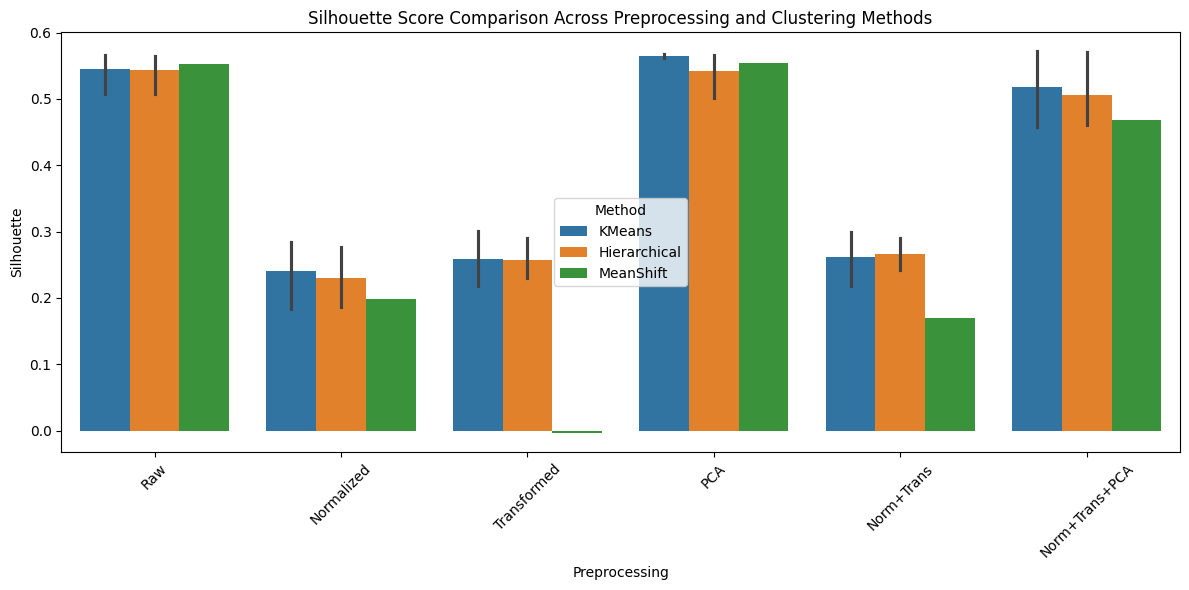

In [1]:
# Wine Dataset Clustering Assignment

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Helper function to evaluate clustering
def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    ch_score = calinski_harabasz_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    return silhouette, ch_score, db_score

# Preprocessing combinations
preprocessing_combinations = {
    'Raw': lambda X: X,
    'Normalized': lambda X: StandardScaler().fit_transform(X),
    'Transformed': lambda X: PowerTransformer().fit_transform(X),
    'PCA': lambda X: PCA(n_components=2).fit_transform(X),
    'Norm+Trans': lambda X: PowerTransformer().fit_transform(StandardScaler().fit_transform(X)),
    'Norm+Trans+PCA': lambda X: PCA(n_components=2).fit_transform(PowerTransformer().fit_transform(StandardScaler().fit_transform(X)))
}

# Clustering methods
cluster_counts = [3, 4, 5]
results = []

for method in preprocessing_combinations:
    X_processed = preprocessing_combinations[method](data)
    for k in cluster_counts:
        # KMeans
        km = KMeans(n_clusters=k, random_state=42)
        km_labels = km.fit_predict(X_processed)
        sil, ch, db = evaluate_clustering(X_processed, km_labels)
        results.append(["KMeans", method, k, sil, ch, db])

        # Hierarchical
        hc = AgglomerativeClustering(n_clusters=k)
        hc_labels = hc.fit_predict(X_processed)
        sil, ch, db = evaluate_clustering(X_processed, hc_labels)
        results.append(["Hierarchical", method, k, sil, ch, db])

    # Mean Shift (no predefined clusters)
    try:
        ms = MeanShift(bandwidth=estimate_bandwidth(X_processed, quantile=0.2))
        ms_labels = ms.fit_predict(X_processed)
        k_ms = len(np.unique(ms_labels))
        sil, ch, db = evaluate_clustering(X_processed, ms_labels)
        results.append(["MeanShift", method, k_ms, sil, ch, db])
    except:
        pass

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Method", "Preprocessing", "Clusters", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])

# Display table
print(results_df)

# Save to CSV
results_df.to_csv("wine_clustering_results.csv", index=False)

# Plotting example: Silhouette comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Preprocessing", y="Silhouette", hue="Method")
plt.title("Silhouette Score Comparison Across Preprocessing and Clustering Methods")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
